In [70]:
from src.graph import subgraph, gen_graph, periodic_of, non_periodic_node
from src.args import Args
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [71]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Generate Graph

Generates the graph and

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


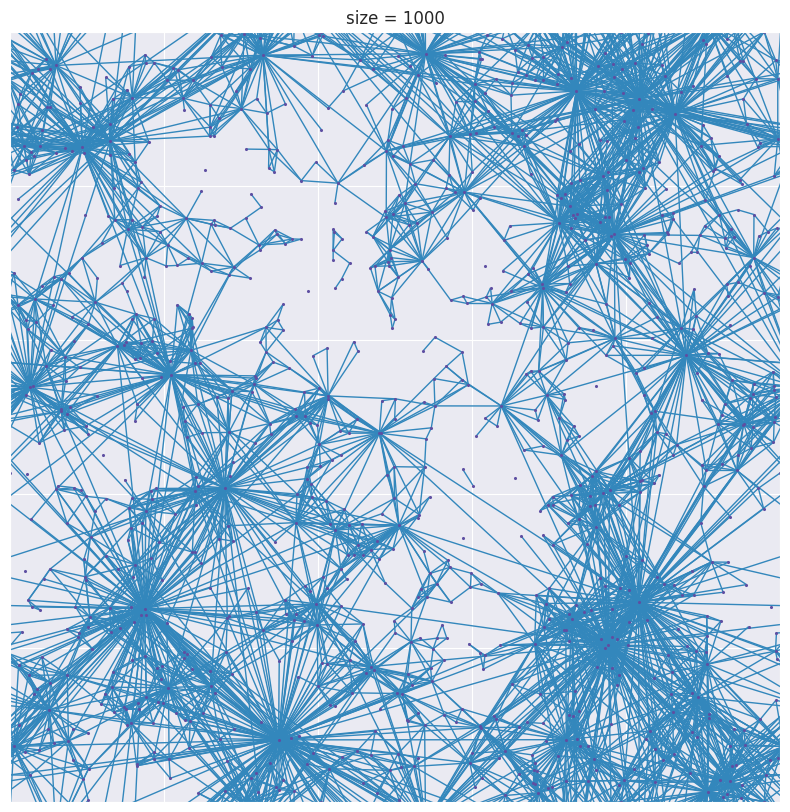

In [85]:
args = Args(
    graph_type="girg"
)

# generate graph
graph, dim = gen_graph(args)

# display settings
cmap = sns.color_palette("Spectral", as_cmap=True)

# set display graph
periodic = args.graph_type == "girg"
if periodic:
    p_graph = periodic_of(graph)
    display_graph = p_graph
else:
    display_graph = graph

# draw original graph (use to select good-looking graph)
fig_size = 10
fig, ax = plt.subplots(
    figsize=(fig_size, fig_size)
)

ax.set_title(f"size = {args.graph_size}", fontsize=12)
ax.set_aspect('equal')
ax.set_xlim(left=0, right=1)
ax.set_ylim(bottom=0, top=1)

nx.draw_networkx(
    display_graph,
    pos=display_graph.nodes.data("pos"),
    node_color=cmap(1.0),
    edge_color=cmap(0.9),
    with_labels=False,
    node_size=1.5,
    ax=ax
)

plt.savefig('complete_out.pdf')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


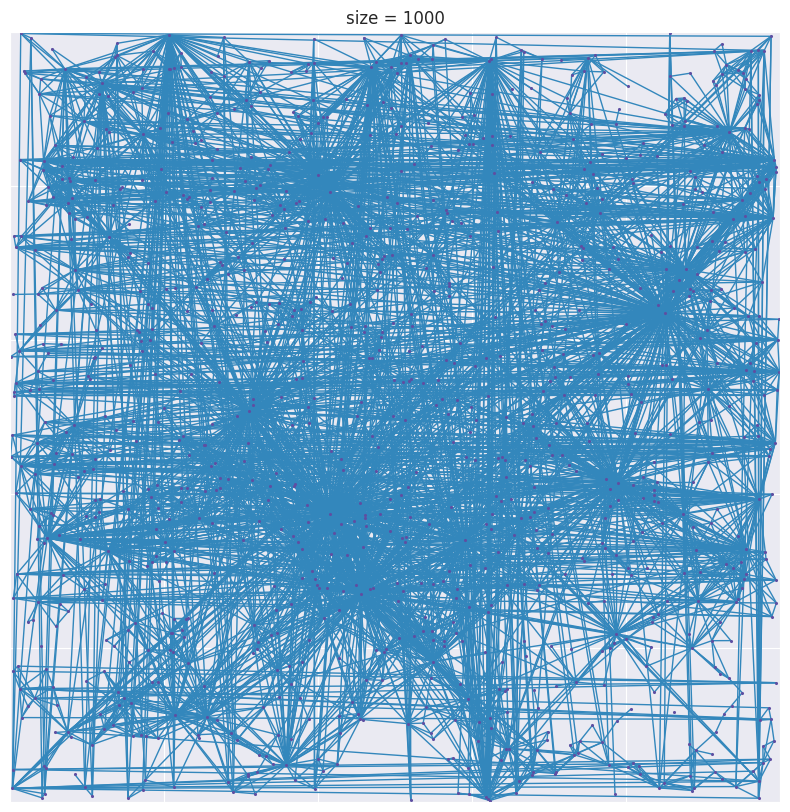

In [79]:
# draw original graph (use to select good-looking graph)
fig_size = 10
fig, ax = plt.subplots(
    figsize=(fig_size, fig_size)
)

ax.set_title(f"size = {args.graph_size}", fontsize=12)
ax.set_aspect('equal')
ax.set_xlim(left=0, right=1)
ax.set_ylim(bottom=0, top=1)

nx.draw_networkx(
    graph,
    pos=graph.nodes.data("pos"),
    node_color=cmap(1.0),
    edge_color=cmap(0.9),
    with_labels=False,
    node_size=1.5,
    ax=ax
)

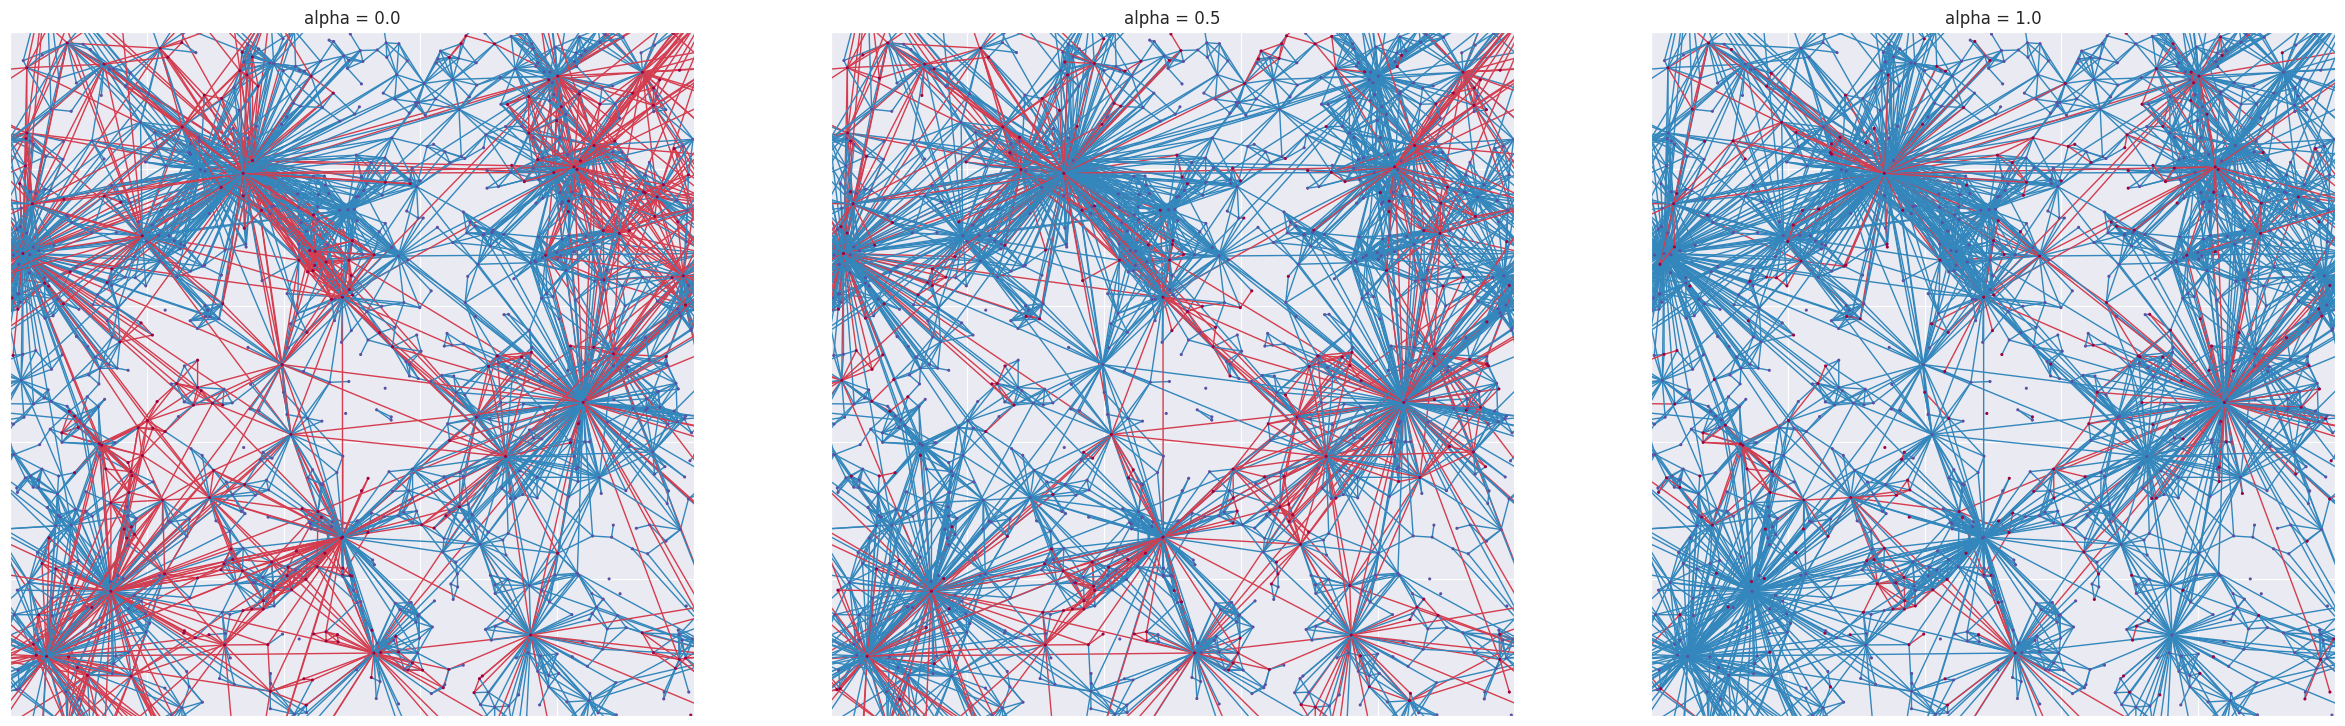

In [77]:
sub_args = [
    Args(
        # graph_size=graph_size,
        epoch_graph_size=250,
        epoch_graph_alpha=epoch_graph_alpha
    )
    # for graph_size in [500, 1000, 2500]
    #for epoch_graph_size in [50, 100, 250]
    for epoch_graph_alpha in [0.0, 0.5, 1.0]
]

fig_size = 10
fig, axs = plt.subplots(
    ncols=len(sub_args),
    nrows=1,
    figsize=(fig_size * len(sub_args), fig_size)
)

for i, a in enumerate(sub_args):

    ax = axs[i]

    ax.set_title(f"alpha = {a.epoch_graph_alpha}", fontsize=12)
    ax.set_aspect('equal')
    ax.set_xlim(left=0, right=1)
    ax.set_ylim(bottom=0, top=1)

    sub, _ = subgraph(
        graph=graph,
        size=a.epoch_graph_size,
        alpha=a.epoch_graph_alpha,
        boredom_pth=0.9,
    )

    node_colors = [
        cmap(0.0) if sub.has_node(non_periodic_node(node)) else cmap(1.0)
        for node in list(display_graph.nodes)
    ]

    edge_colors = [
        cmap(0.1) if sub.has_edge(non_periodic_node(u), non_periodic_node(v)) else cmap(0.9)
        for (u, v) in display_graph.edges
    ]

    nx.draw_networkx(
        display_graph,
        pos=display_graph.nodes.data("pos"),
        with_labels=False,
        node_size=1.5,
        node_color=node_colors,
        edge_color=edge_colors,
        ax=ax
    )

plt.savefig('subs_out.pdf')